In [ ]:
!pip install tensorflow==1.14.0

     |████████████████████████████████| 109.3MB 83kB/s 
     |████████████████████████████████| 491kB 29.4MB/s 
     |████████████████████████████████| 51kB 7.3MB/s 
     |████████████████████████████████| 3.2MB 23.1MB/s 
ERROR: kapre 0.3.5 has requirement tensorflow>=2.0.0, but you'll have tensorflow 1.14.0 which is incompatible.
  Found existing installation: tensorflow-estimator 2.5.0
    Uninstalling tensorflow-estimator-2.5.0:
      Successfully uninstalled tensorflow-estimator-2.5.0
  Found existing installation: tensorboard 2.5.0
    Uninstalling tensorboard-2.5.0:
      Successfully uninstalled tensorboard-2.5.0
  Found existing installation: tensorflow 2.5.0
    Uninstalling tensorflow-2.5.0:


In [ ]:
!unzip models.zip

In [ ]:
!pip install PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [ ]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
download = drive.CreateFile({'id': '1DpXhjXw9v4mwubR2bw8Yw72MhuqWDQQJ'})
download.GetContentFile('c3d_ucf101_finetune_whole_iter_20000_TF.model')

In [ ]:
import shutil, sys  

shutil.move("c3d_ucf101_finetune_whole_iter_20000_TF.model", "models/pretrained_models/") 

'models/pretrained_models/c3d_ucf101_finetune_whole_iter_20000_TF.model'

In [ ]:
download = drive.CreateFile({'id': '1r-PYXGcnjZHxdhSfZjNH171JjaM0Lnja'})
download.GetContentFile('Assault024_x264.zip')

In [ ]:
!unzip Assault024_x264.zip

Archive:  Assault024_x264.zip
   creating: Assault024_x264/
  inflating: Assault024_x264/frame212.jpg  
  inflating: Assault024_x264/frame211.jpg  
  inflating: Assault024_x264/frame210.jpg  
  inflating: Assault024_x264/frame21.jpg  
  inflating: Assault024_x264/frame209.jpg  
  inflating: Assault024_x264/frame208.jpg  
  inflating: Assault024_x264/frame207.jpg  
  inflating: Assault024_x264/frame206.jpg  
  inflating: Assault024_x264/frame205.jpg  
  inflating: Assault024_x264/frame204.jpg  
  inflating: Assault024_x264/frame203.jpg  
  inflating: Assault024_x264/frame202.jpg  
  inflating: Assault024_x264/frame201.jpg  
  inflating: Assault024_x264/frame200.jpg  
  inflating: Assault024_x264/frame20.jpg  
  inflating: Assault024_x264/frame2.jpg  
  inflating: Assault024_x264/frame199.jpg  
  inflating: Assault024_x264/frame198.jpg  
  inflating: Assault024_x264/frame197.jpg  
  inflating: Assault024_x264/frame196.jpg  
  inflating: Assault024_x264/frame195.jpg  
  inflating: Assault

In [ ]:
download = drive.CreateFile({'id': '1t8izbDP39J1UdUtKbv2UBeT9xXF28g5L'})
download.GetContentFile('checkpoint.zip')

In [ ]:
!unzip checkpoint.zip

Archive:  checkpoint.zip
   creating: checkpoint/
  inflating: checkpoint/checkpoint   
  inflating: checkpoint/model.index  
  inflating: checkpoint/model.data-00000-of-00001  
  inflating: checkpoint/model.meta   


In [ ]:
import cv2
import os
import numpy as np
#import matplotlib.pyplot as plt

class Video(object):

    def __init__(self, filename, isAnomaly, width=320, height=240):
        if filename is None:
            raise ValueError("invalid filename argument")
        self.isAnomaly=isAnomaly
        self.filename = filename
        self.frames=[]
        self.frameCount = 0
        self.width = width
        self.height = height
        self.__setFrames()


    def __split(self):
        print(self.filename)
        if os.path.exists(self.filename) is False:
            raise ValueError("Video File Not Found. Could not find: %s" % ('dataset/videos/'+self.filename))
        videoSource = cv2.VideoCapture(self.filename)
        success,image = videoSource.read() #success is true if file exist, and loads first frame in image
        count = 0
        dir = os.path.splitext(self.filename)[0] 
        if os.path.isdir(dir) is False:
            os.makedirs(dir)
        while success:
            resize_image = cv2.resize(image,(self.width, self.height))
            cv2.imwrite(dir+"/frame%d.jpg" %count,resize_image)
            success, image = videoSource.read()
            count+=1
        #print("Read %d Frames" %count)
        return count


    def __setFrames(self):

        """Sets frames from the video.
                Retrieves frames from the video and returns an image array.
                Image size is 240x320
                Before running, video should be in 30FPS.
                Args:
                Returns:

                Raises:
                    ValueError: Video File Not Found.
        """

        dir = os.path.splitext(self.filename)[0]  # gets the directory location
        if os.path.isdir(dir) is False:
            self.__split()

        count = len(os.listdir(dir)) #count list of files inside directory

        imageArr=[]
        for i in range(count):
            image = cv2.imread(dir+"/frame%d.jpg"%i)
            if image is not None: 
                imageArr.append(image)

        self.frames=imageArr
        self.frameCount = len(imageArr)

    def getFrames(self):
        return np.array(self.frames)

    def getAnomaly(self):
        return self.isAnomaly

    def getFilename(self):
        return self.filename

    def getFrameCount(self):
        return self.frameCount

    def resize(self, new_width, new_height):
        self.frames = [cv2.resize(frame, (new_width, new_height)) for frame in self.frames]

    def getSegments(self):
        count = self.getFrameCount()
        print("Getting segments:", count, " total frames.")
        frames = np.array(self.getFrames())
        print("FRAMES SHAPE: %s" % (str(frames.shape)))
        if count % 16 != 0:
            print("REMOVING FRAMES: %d" % (count%16))
            frames = frames[:-(count%16)]

        segments = frames.reshape([-1, 16, 112, 112, 3])
        
        print("SEGMENT SHAPE: %s" % (str(segments.shape)))
        return segments

    def __str__(self):
        return "You are print video object, use one of my methods, My filename is "+self.filename


In [ ]:
import requests
import datetime
def sms(pesttext):
    url = 'https://www.smsgateway.center/SMSApi/rest/send'
    f = '%Y-%m-%d %H:%M:%S.%f%z'
    from datetime import datetime, timedelta
    t = datetime.now() + timedelta(seconds=19830)
    out = t.strftime("%Y-%m-%d %H:%M:%S")
    print(out)
    querystring = {
        'userId': 'mitron',
        'password': 'Mitron@123',
        'senderId': 'MiHelp',
        'sendMethod': 'simpleMsg',
        'msgType': 'text',
        'mobile': '8296173833',
        'msg': pesttext,
        'duplicateCheck': 'true',
        'format': 'json',
        'scheduleTime': out,
        'TEMPLATE_ID': '1207161909148668780',
        'TEMPLATE_NAME': 'Crime',
        }
    headers = {'cache-control': 'no-cache'}
    response = requests.request('GET', url, headers=headers,
                                params=querystring)
    print(response.text)

In [ ]:
#sms('Crime/Anomaly Detected ,Kindly click the location  https://goo.gl/maps/Ky4Xxvvo5PnSSNqG9  --MitronTech')

2021-05-22 15:38:05
{"status":"success","mobile":"917795391168","invalidMobile":"","transactionId":"5640602050992818582","statusCode":"900","reason":"success"}


In [ ]:
#from ucsd_dataset import ucsd_dataset
from models.c3d_model import C3DModel
from models.bc_model import BCModel
import numpy as np
import cv2
#from Video import Video

def main():
    # Load in one of the videos from the dataset
    folder = "Assault024_x264"
    selected_video = Video(folder, 1)
    selected_video.resize(112,112)
    selected_video = selected_video.getSegments()

    c3d = C3DModel()
    features, elapsed_time = c3d.predict(selected_video)
    print("Extracting features...")
    print("Elapsed time: %fs" % (elapsed_time))
    bc = BCModel()
    bc.load_model("checkpoint/model")
    scores, elapsed_time = bc.predict(features)

    url = 'Assault024_x264/'
    img = []
    dir = os.path.splitext("Assault024_x264/")[0]
    frames = len(os.listdir(dir))
    imageArr=[]
    for i in range(frames):
        image = cv2.imread(dir+"/frame%d.jpg"%i)
        if image is not None:
             imageArr.append(image)
    print("Images loaded!!!")        

    # Collect all the images into a Python list
    print("Gathering images...")
   # for k in range(0, frames+1):
   #     print("Progress: %2.1f" % (float(k) / frames))
   #     img.append(cv2.imread(url + '/frame' + str(k) + '.jpg'))

    height, width, layers = imageArr[0].shape

    print("Predicting scores...")
    print("Elapsed time: %fs" % (elapsed_time))

    # Iterate through and print out each 16-frame anomaly score and
    cou = 0
    for i in range(len(scores)):
        w = i*16
        # Ask use for the name of the video and how many frames to use

        if scores[i] > 0.5:
          for w in range((i*16),(i+1)*16):
              font = cv2.FONT_HERSHEY_SIMPLEX 
#             cv2.rectangle(img[w],(384,0),(240,240),(0,255,0),3)
              print("Printing Text...")
              cv2.putText(imageArr[w],'crime Detected',(100,100), font, 0.8, (0,0,255), 2, cv2.LINE_AA)
              if cou == 0:
                 sms("Crime/Anomaly Detected ,Kindly click the location  https://goo.gl/maps/Ky4Xxvvo5PnSSNqG9  --MitronTech")
                 cou = cou +1

        print("Frames (%4d to %4d)\tScore: %f\t%s" % (i*16,(i+1)*16,scores[i], "crime detected!" if scores[i] > .5 else ""))

    # Convert the list of images to a video and saves it to the working directory
    print("Creating video writer...")
    fourcc = cv2.VideoWriter_fourcc(*'XVID')
    video = cv2.VideoWriter('crime1.avi', fourcc, 30.0, (width, height))
    print("Video writer created!")

    print("Total Frames: %d" % (len(img)))

    # Writes each image to the video
    print("Writing Frames...")
    for j in range(0, frames):
        print("Progress: %2.1f" % (float(j)/frames))
        video.write(imageArr[j])

    # Finalization
    print("Finalizing...")
    cv2.destroyAllWindows()
    video.release()
    print("Finished!!!")

/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or 

In [ ]:
if __name__ == '__main__':
  main()

Getting segments: 446  total frames.
FRAMES SHAPE: (446, 112, 112, 3)
REMOVING FRAMES: 14
SEGMENT SHAPE: (27, 16, 112, 112, 3)





Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
dim is deprecated, use axis instead

Instructions for updating:
Use standard file APIs to check for files with this prefix.
INFO:tensorflow:Restoring parameters from ./models/pretrained_models/c3d_ucf101_finetune_whole_iter_20000_TF.model
INPUT SHAPE: (27, 16, 112, 112, 3)
Extracting features...
Elapsed time: 42.322357s

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
INFO:tensorflow:Restoring parameters from checkpoint/model
INPUT SHAPE: (27, 4096)
Images loaded!!!
Gathering images...
Predicting scores...
Elapsed time: 0.025668s
Frames (   0 to   16)	Scor

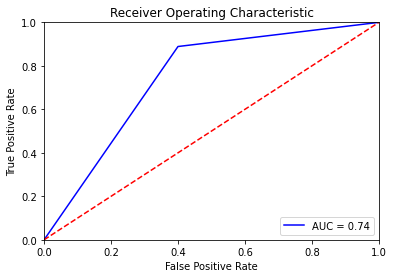

In [ ]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = [0,1,1,1,0,1,1,1,1,0,0,1,1,0]
preds = [1,0,1,1,0,1,1,1,1,0,1,1,1,0]
fpr, tpr, threshold = metrics.roc_curve(probs, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()